We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [332]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-17 17:05:34--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.78, 13.227.223.83, 13.227.223.117, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.78|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [333]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [334]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', na_filter=False)
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386,Asia
1,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386,Asia
2,2020-05-15,15,5,2020,113,6,Afghanistan,AF,AFG,37172386,Asia
3,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386,Asia
4,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386,Asia
5,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386,Asia
6,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386,Asia
7,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386,Asia
8,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386,Asia
9,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386,Asia


To make room in the dataframe for future predictions, we add columns for those values and set them to missing for now.

In [335]:
#df['pcases']  = np.nan
#df['pdeaths'] = np.nan

Last check of our source dataframe.

In [336]:
df.count()

dateRep                    17576
day                        17576
month                      17576
year                       17576
cases                      17576
deaths                     17576
countriesAndTerritories    17576
geoId                      17576
countryterritoryCode       17576
popData2018                17576
continentExp               17576
dtype: int64

We pivot to a country by column format.

In [337]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                          ...  \
geoId         AD     AE      AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                   ...   
2019-12-31   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...     ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-13   2.0  783.0   280.0  0.0  0.0   4.0  146.0  0.0  529.0  36.0  ...   
2020-05-14   2.0  725.0   259.0  0.0  0.0   4.0  180.0  0.0  316.0  54.0  ...   
2020-05-15   1.0  698.0   113.0  0.0  0.0  18.0  142.0  3.0  255.0  41.0  ...   
2020-05-16   0.0  747.0  1063.0  0.0  0.0  18.0  184.0  0.0  345.0  63.0  ...   
2020-05-17   0.0  796.0     0.0  0.0  0.0  17.0  239.0  0.0  326.0  72.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-13    0.0  0.0  0.0  0.0  0.0  1.0  2.0   0.0  0.0  0.0  
2020-05-14    0.0  0.0  0.0  1.0  0.0  0.0  1.0  13.0  0.0  0.0  
2020-05-15    0.0  0.0  0.0  0.0  0.0  0.0  1.0  19.0  0.0  0.0  
2020-05-16    0.0  0.0  0.0  0.0  0.0  0.0  2.0   9.0  0.0  0.0  
2020-05-17    0.0  0.0  0.0  0.0  0.0  0.0  4.0  14.0  0.0  0.0  

[139 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [338]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('243 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-01-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-01-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-01-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-01-14   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-01-15   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-01-11 NaN  NaN NaN NaN NaN NaN NaN  
2021-01-12 NaN  NaN NaN NaN NaN NaN NaN  
2021-01-13 NaN  NaN NaN NaN NaN NaN NaN  
2021-01-14 NaN  NaN NaN NaN NaN NaN NaN  
2021-01-15 NaN  NaN NaN NaN NaN NaN NaN  

[382 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [339]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    382.000000
mean     554.500000
std      110.418145
min      364.000000
25%      459.250000
50%      554.500000
75%      649.750000
max      745.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak usually fits a gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. Before fitting we have to find out how far a country has come along the curve. We use the residuals of a fit along the double logarithm, which should approach a straight line.

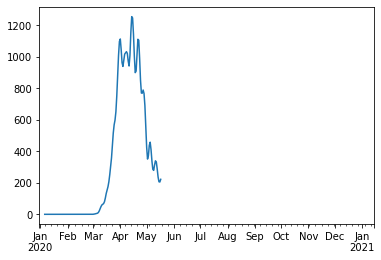

In [340]:
country  = 'NL'
measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7, win_type='hann').mean()

df_pred = pd.DataFrame({'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
df_pred[measure].plot()

To ignore early outbreaks and long tails, we define the minimum case count as one in million and find the current total number of cases for scaling.

In [341]:
mincases = df[df['geoId'] == country]['popData2018'].iloc[0] / 1e6
maxcases = df_pred[measure].cumsum().max()
print(mincases, maxcases)

17.231017 43225.66666666666


From our dataframe we select only the days with cases above the minimum and create a column with cumulative data for fitting the gumbel distribution, which is cumulative.

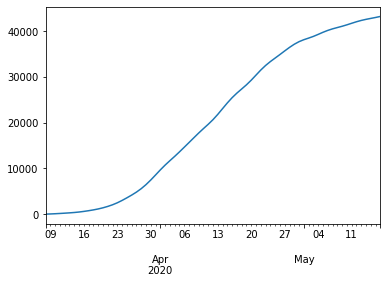

In [342]:
df_pred = df_pred[df_pred[measure] > mincases]
df_pred['cumul'] = df_pred[measure].cumsum()
df_pred['cumul'].plot()

For correct scaling of the data we need to find the current progress of the outbreak, in other words, what part of the distribution we wil try to fit. The function below takes a progress as input and determines the fit for that progress, returning the residuals as a measure of fit quality.

Preparing for the fit, we normalize our input and scale with the current number for progress. Preventing numerical errors we select cases below one, taking the double negative logarithm after we make sure the input is at least larger than 4 measures, to prevent spurious fits. (Such as fitting on just two measures, which would be perfect but not relevant.)

In [343]:
def calcresd(progress):
    global df_pred, fit
    df_pred['scaled'] = df_pred['cumul'] / maxcases * progress
    df_pred = df_pred[df_pred['scaled'] < 1]
    if len(df_pred) > 4:
        df_pred['linear'] = - np.log(- np.log(df_pred['scaled']))
        fit = np.polyfit(x=df_pred['daynum'], y=df_pred['linear'], deg=1, full=True)
        print('Progress %11.9f gives %12.9f' %(progress[0], fit[1][0]))
        return(fit[1][0])
    else:
        return 99

An optimizer can call the function repeatedly to find the input that returns the best output. In this case `minimize` will find the progress that returns the lowest residuals, indicating the best fit. We use a least squares method that searches from 1 to any number between 0.1 and 1. If a country is at less than 10% of progress the numbers will not likely produce a relevant curve.

In [344]:
from scipy.optimize import minimize

optim = minimize(calcresd, 1, method='SLSQP', bounds=[(0.1, 1)])

Progress 1.000000000 gives 21.054232830
Progress 1.000000000 gives 21.054232830
Progress 1.000000015 gives 21.054384820
Progress 0.100000000 gives  1.274315356
Progress 0.549028293 gives  1.692632590
Progress 0.773561027 gives  0.943696494
Progress 0.885786034 gives  0.225103383
Progress 0.941853383 gives  0.255879751
Progress 0.969870102 gives  1.311212312
Progress 0.983900804 gives  3.213442395
Progress 0.983900804 gives  3.213442395
Progress 0.983900819 gives  3.213445738
Progress 0.983538799 gives  3.133535090
Progress 0.983538799 gives  3.133535090
Progress 0.983538814 gives  3.133538326
Progress 0.981786022 gives  2.780225681
Progress 0.981786022 gives  2.780225681
Progress 0.981786037 gives  2.780228467
Progress 0.974241750 gives  1.712750406
Progress 0.974241750 gives  1.712750406
Progress 0.974241765 gives  1.712751987
Progress 0.964353042 gives  0.942402057
Progress 0.964353042 gives  0.942402057
Progress 0.964353057 gives  0.942402892
Progress 0.953289116 gives  0.490824134


The optimization gives detailed results, such as the best result in `fun`, the number of fitted measures in `nfev` and the optimal input in `x[0]`. That number is the actual progress, e.g. a result of `0.77` would mean that we estimate the outbreak at 77% of total cases.

In [345]:
progress = optim.x[0]
print(optim)

     fun: 0.11783484107189261
     jac: array([0.00162646])
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.91756412])


The `scaled` column contains the scaled cumulative distribution that should look like a gumbel cumulative distribution.

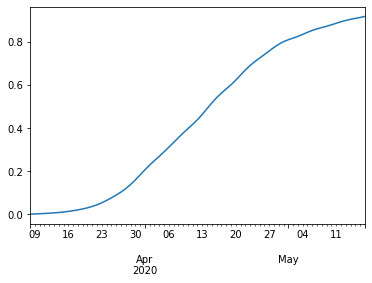

In [346]:
df_pred['scaled'].plot()

The `linear` column contains the line that we try to fit. We can check the fit with `polyval`, applying the linear factors to the input column with day numbers and plotting both `linear` and `fitted` for a visual check.

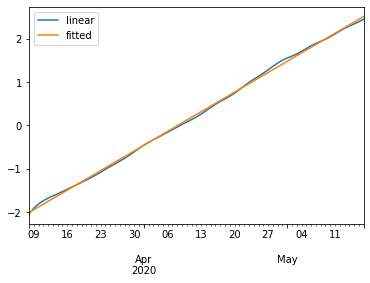

In [347]:
df_pred['fitted'] = np.polyval(fit[0], df_pred['daynum'])
df_pred[['linear', 'fitted']].plot()

From slope and intercept of this line we can calculate beta and mu of the Gumbel distribution.

In [348]:
slope = fit[0][0]
intercept = fit[0][1]
print(slope, intercept)
beta = 1 / slope
mu = - intercept * beta
print(beta, mu)

0.06451754135277121 -29.87968805720272
15.499660697424378 463.1250266315256


Finished fitting, now back to the original data! Once we have the fitted values, we take the double negative exponential to find the estimated cumulative curve. To reduce that to the orignal curve we take the difference between subsequent values with `shift`.

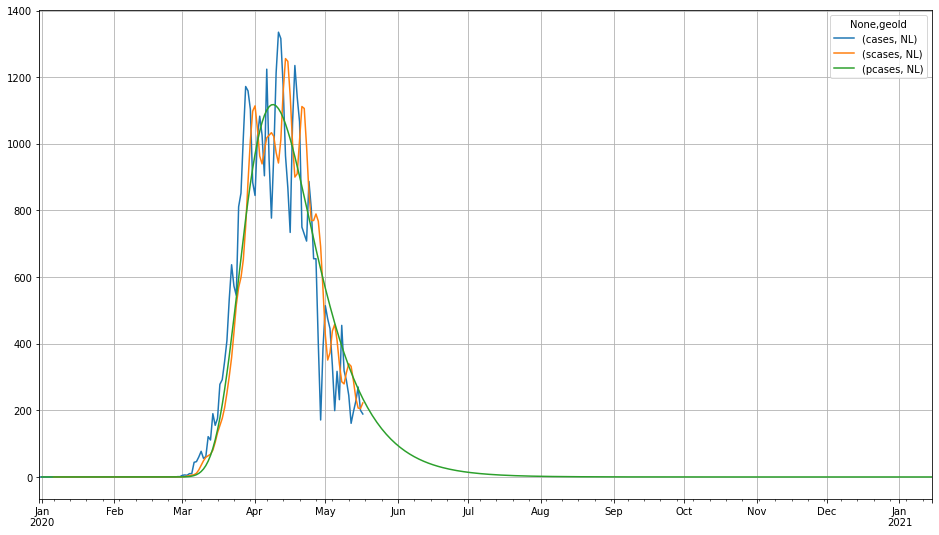

In [349]:
df_geo[(pmeasure, country)] = np.exp(- np.exp(- np.polyval(fit[0], df_geo['daynum']))) * maxcases / progress
df_geo[(pmeasure, country)] = df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

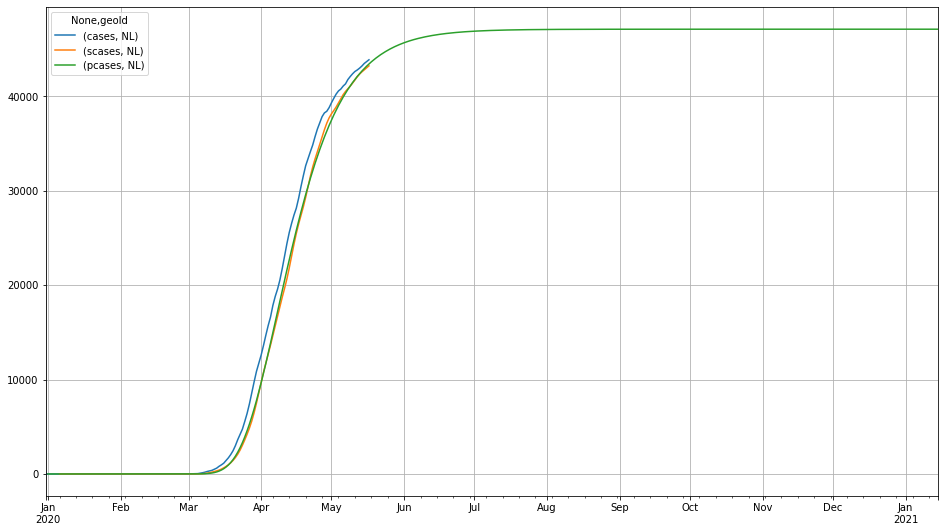

In [350]:
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

The end value would be the estimated total number.

In [351]:
df_geo[pmeasure][country].cumsum().max()

47109.15026282759

The peak can be found at the first predicted value that is larger then the next.

In [352]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))]['daynum'].index.min()
print(peak)

2020-04-09 00:00:00


The floor is defined as the first time that the number of reported cases falls below 2 in a million, which is the first time that happens *after* the peak.

In [353]:
floor = df_geo[(df_geo[(pmeasure, country)] < (df[df['geoId'] == country]['popData2018'].iloc[0] / 5e5)) & (df_geo[(pmeasure, country)].index > peak)]['daynum'].index.min()
print(floor)

2020-06-17 00:00:00


Keep exploring! Stay home, wash your hands, keep your distance.